In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#reading train dataset to python

In [2]:
train=pd.read_csv("train_v9rqX0R.csv")

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#reading test dataset into python

In [4]:
test=pd.read_csv("test_AbJTz2l.csv")

In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [ ]:
#reading submission file to python

In [6]:
ss=pd.read_csv("sample_submission_8RXa3c6.csv")

In [7]:
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [8]:
train.shape

(8523, 12)

In [9]:
test.shape

(5681, 11)

In [10]:
ss.shape

(5681, 3)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
#summary statistics

In [12]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [16]:
test.apply(lambda x: len(x.unique()))

Item_Identifier              1543
Item_Weight                   411
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [17]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
train["Item_Weight"].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [20]:
train["Item_Weight"].fillna(train["Item_Weight"].mean(),inplace=True)

In [21]:
train["Item_Weight"].describe()

count    8523.000000
mean       12.857645
std         4.226124
min         4.555000
25%         9.310000
50%        12.857645
75%        16.000000
max        21.350000
Name: Item_Weight, dtype: float64

In [22]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [23]:
train["Outlet_Size"]

0       Medium
1       Medium
2       Medium
3          NaN
4         High
         ...  
8518      High
8519       NaN
8520     Small
8521    Medium
8522     Small
Name: Outlet_Size, Length: 8523, dtype: object

In [24]:
train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [25]:
train["Outlet_Size"].mode()

0    Medium
Name: Outlet_Size, dtype: object

In [ ]:
#data preprocessing

In [26]:
train["Outlet_Size"].fillna(train["Outlet_Size"].mode()[0],inplace=True)

In [27]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [28]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [29]:
test["Item_Weight"].fillna(test["Item_Weight"].mean(),inplace=True)

In [30]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [31]:
test["Outlet_Size"].fillna(test["Outlet_Size"].mode()[0],inplace=True)

In [32]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [33]:
train["Item_Identifier"].nunique()

1559

In [34]:
train.apply(lambda x: len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [35]:
train.drop(["Item_Identifier","Item_Visibility","Outlet_Identifier"],axis=1,inplace=True)

In [36]:
test.drop(["Item_Identifier","Item_Visibility","Outlet_Identifier"],axis=1,inplace=True)

In [37]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5681 non-null   float64
 1   Item_Fat_Content           5681 non-null   object 
 2   Item_Type                  5681 non-null   object 
 3   Item_MRP                   5681 non-null   float64
 4   Outlet_Establishment_Year  5681 non-null   int64  
 5   Outlet_Size                5681 non-null   object 
 6   Outlet_Location_Type       5681 non-null   object 
 7   Outlet_Type                5681 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 355.2+ KB


In [ ]:
#checking for outliers

Text(0.5, 1.0, 'box plot of item weight')

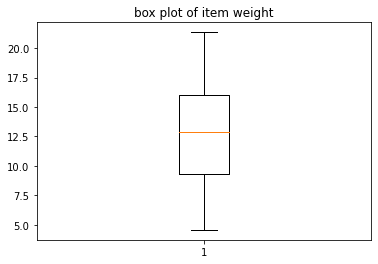

In [39]:
plt.boxplot(train["Item_Weight"])
plt.title("box plot of item weight")

Text(0.5, 1.0, 'boxplot of item mrp columns')

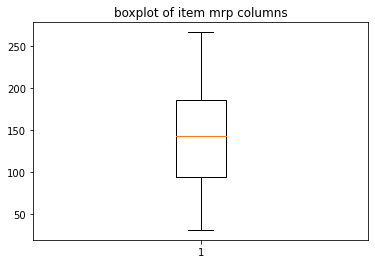

In [40]:
plt.boxplot(train["Item_MRP"])
plt.title("boxplot of item mrp columns")

{'whiskers': [<matplotlib.lines.Line2D at 0x29717d70760>,
 'caps': [<matplotlib.lines.Line2D at 0x29717d70d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x29717d70490>],
 'medians': [<matplotlib.lines.Line2D at 0x29717d7e2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x29717d7e5e0>],
 'means': []}

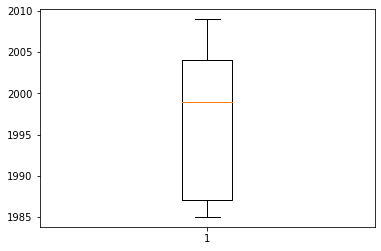

In [41]:
plt.boxplot(train["Outlet_Establishment_Year"])

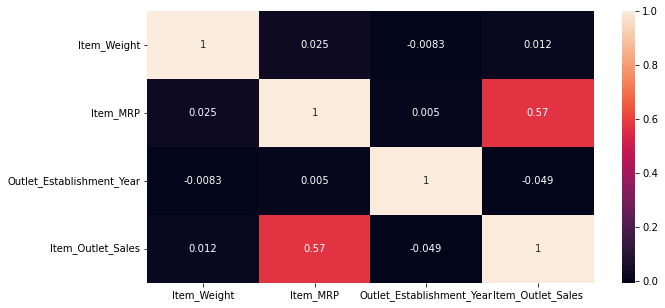

In [42]:
plt.figure(figsize=(10,5))
sns.heatmap(train.corr(),vmin=-0.0083,vmax=1.0,annot=True)
plt.show()

In [43]:
train

,Item_Weight,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.300,Low Fat,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.920,Regular,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.500,Low Fat,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.200,Regular,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.930,Low Fat,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,Snack Foods,214.5218,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,8.380,Regular,Baking Goods,108.1570,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,10.600,Low Fat,Health and Hygiene,85.1224,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,7.210,Regular,Snack Foods,103.1332,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [44]:
train.describe()

,Item_Weight,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,140.992782,1997.831867,2181.288914
std,4.226124,62.275067,8.371760,1706.499616
min,4.555000,31.290000,1985.000000,33.290000
25%,9.310000,93.826500,1987.000000,834.247400
50%,12.857645,143.012800,1999.000000,1794.331000
75%,16.000000,185.643700,2004.000000,3101.296400
max,21.350000,266.888400,2009.000000,13086.964800


In [45]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Item_MRP                   8523 non-null   float64
 4   Outlet_Establishment_Year  8523 non-null   int64  
 5   Outlet_Size                8523 non-null   object 
 6   Outlet_Location_Type       8523 non-null   object 
 7   Outlet_Type                8523 non-null   object 
 8   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(3), int64(1), object(5)
memory usage: 599.4+ KB


In [46]:
train.apply(lambda x: len(x.unique()))

Item_Weight                   416
Item_Fat_Content                5
Item_Type                      16
Item_MRP                     5938
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [47]:
train.drop("Item_MRP",axis=1,inplace=True)

In [48]:
test.drop("Item_MRP",axis=1,inplace=True)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Type                  8523 non-null   object 
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Size                8523 non-null   object 
 5   Outlet_Location_Type       8523 non-null   object 
 6   Outlet_Type                8523 non-null   object 
 7   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(2), int64(1), object(5)
memory usage: 532.8+ KB


In [107]:
#labelEncoding

In [50]:
from sklearn.preprocessing import LabelEncoder

In [51]:
le=LabelEncoder()
train=train.apply(le.fit_transform)

In [52]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,1,4,4,1,0,1,2540
1,57,2,14,8,1,2,2,422
2,376,1,10,4,1,0,1,1639
3,393,2,6,3,1,2,0,670
4,265,1,9,1,0,2,1,865


In [53]:
test=test.apply(le.fit_transform)

In [54]:
test.head()

,Item_Weight,Item_Fat_Content,Item_Type,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,404,1,13,4,1,0,1
1,223,4,4,7,1,1,1
2,338,1,11,3,1,2,0
3,156,1,13,7,1,1,1
4,319,2,4,0,1,2,3


In [ ]:
#spltting data into target and features

In [55]:
y=train['Item_Outlet_Sales']
X=train.drop("Item_Outlet_Sales",axis=1)

In [ ]:
#train-test split

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [60]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int64

In [ ]:
#scaling

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
sc=StandardScaler()

In [63]:
X_train_std=sc.fit_transform(X_train)

In [64]:
X_train_std

array([[ 0.68949178, -0.56545974,  0.41386297, ..., -0.28737371,
         1.08494779,  0.98357205],
       [ 0.56239951,  0.97324552,  1.36613513, ..., -0.28737371,
         1.08494779,  0.98357205],
       [ 0.21289578,  0.97324552,  0.65193101, ..., -0.28737371,
        -1.38477667, -0.26359965],
       ...,
       [ 0.81658404, -0.56545974,  0.17579492, ..., -0.28737371,
        -0.14991444, -0.26359965],
       [ 1.11313266,  2.51195078,  1.36613513, ..., -0.28737371,
        -0.14991444, -0.26359965],
       [ 0.68949178, -2.104165  ,  0.41386297, ...,  1.38404828,
        -1.38477667, -0.26359965]])

In [65]:
X_test_std=sc.transform(X_test)

In [66]:
X_train_std

array([[ 0.68949178, -0.56545974,  0.41386297, ..., -0.28737371,
         1.08494779,  0.98357205],
       [ 0.56239951,  0.97324552,  1.36613513, ..., -0.28737371,
         1.08494779,  0.98357205],
       [ 0.21289578,  0.97324552,  0.65193101, ..., -0.28737371,
        -1.38477667, -0.26359965],
       ...,
       [ 0.81658404, -0.56545974,  0.17579492, ..., -0.28737371,
        -0.14991444, -0.26359965],
       [ 1.11313266,  2.51195078,  1.36613513, ..., -0.28737371,
        -0.14991444, -0.26359965],
       [ 0.68949178, -2.104165  ,  0.41386297, ...,  1.38404828,
        -1.38477667, -0.26359965]])

In [67]:
X_test_std

array([[ 0.42471622, -0.56545974, -0.5384092 , ..., -1.9587957 ,
         1.08494779, -0.26359965],
       [-1.01566278, -0.56545974,  0.17579492, ...,  1.38404828,
        -1.38477667, -0.26359965],
       [ 0.44589827,  0.97324552, -1.01454528, ..., -0.28737371,
        -1.38477667, -0.26359965],
       ...,
       [-0.89916154, -0.56545974, -0.30034116, ..., -0.28737371,
        -0.14991444, -0.26359965],
       [-2.09594703, -0.56545974,  0.41386297, ..., -0.28737371,
        -1.38477667, -0.26359965],
       [ 0.53062644, -0.56545974, -0.5384092 , ..., -0.28737371,
        -0.14991444, -0.26359965]])

In [68]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int64

In [69]:
y_train

4776     485
7510    2205
5828    1291
5327    1123
4810    1363
        ... 
5734     274
5191    1099
5390    3270
860     1337
7270     841
Name: Item_Outlet_Sales, Length: 6392, dtype: int64

In [ ]:
#model-Evaluation

In [70]:
#linear-regression model
lr=LinearRegression()
model=lr.fit(X_train,y_train)
predictions=model.predict(X_test)

In [71]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int64

In [72]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [73]:
print(r2_score(y_test,predictions))

0.2306301961085353


In [74]:
print(mean_absolute_error(y_test,predictions))

663.4126288937083


In [75]:
print(mean_squared_error(y_test,predictions))

634408.8512164537


In [ ]:
#Randomforestregressor model

In [76]:
from sklearn.ensemble import RandomForestRegressor

In [77]:
rf_clf=RandomForestRegressor()
rf_clf=rf_clf.fit(X_train,y_train)
y_pred_rf=rf_clf.predict(X_test)

In [78]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int64

In [79]:
print(r2_score(y_test,y_pred_rf))

0.310947030575078


In [80]:
print(mean_absolute_error(y_test,y_pred_rf))

592.7277788601839


In [81]:
print(np.sqrt(mean_squared_error(y_test,y_pred_rf)))

753.777817185079


In [ ]:
"""
here random forest regressor model is better than the linear regression model because mean sqaured error is 
very high in the case of linear regression model
"""

In [82]:
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000


In [83]:
ss.drop("Item_Outlet_Sales",axis=1,inplace=True)

In [84]:
ss.head()

,Item_Identifier,Outlet_Identifier
0,FDW58,OUT049
1,FDW14,OUT017
2,NCN55,OUT010
3,FDQ58,OUT017
4,FDY38,OUT027


In [87]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int64

In [100]:
Y_predictedvalues=y_test